In [508]:
%pylab inline
indir = '/mnt/store1/oliverphilcox/3PCF_comb/'
n=10
m=3

Populating the interactive namespace from numpy and matplotlib


/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mat']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


#### Load first integral part

In [509]:
def symmetrize(mat):
    """ Add in symmetries to matrices """
    out_mat = np.zeros_like(mat)
    for i in range(len(mat)//m):
        a = i//n
        b = i%n
        for j in range(len(mat)//m):
            c = j//n
            d = j%n
            # Add to all relevant bins
            these_mat = mat[i*m:(i+1)*m,j*m:(j+1)*m]*0.25
            out_mat[(a*n+b)*m:(a*n+b)*m+m,(c*n+d)*m:(c*n+d)*m+m]+=these_mat
            out_mat[(b*n+a)*m:(b*n+a)*m+m,(c*n+d)*m:(c*n+d)*m+m]+=these_mat
            out_mat[(b*n+a)*m:(b*n+a)*m+m,(d*n+c)*m:(d*n+c)*m+m]+=these_mat
            out_mat[(a*n+b)*m:(a*n+b)*m+m,(d*n+c)*m:(d*n+c)*m+m]+=these_mat
    return 0.5*(out_mat+out_mat.T)

In [510]:
bins_r = np.loadtxt('/mnt/store1/oliverphilcox/3PCF/3pcf_binfile_cov.csv')

In [672]:
c3=np.loadtxt(indir+'c3_n10_l4_1_full.txt')
c4=np.loadtxt(indir+'c4_n10_l4_1_full.txt')
c5=np.loadtxt(indir+'c5_n10_l4_1_full.txt')
c6=np.loadtxt(indir+'c6_n10_l4_1_full.txt')

In [673]:
c3_0=np.loadtxt(indir+'c3_n10_l4_0_full.txt')
c3_1=np.loadtxt(indir+'c3_n10_l4_1_full.txt')

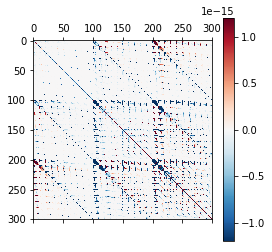

In [682]:
mat=rebinner(symmetrize(c3_0-c3_1))
vmax=np.percentile(mat,99.)
plt.matshow(mat,vmax=vmax,vmin=-vmax,cmap=cm.RdBu_r);
plt.colorbar();

In [689]:
tot_mat = symmetrize(c3+c4+c5+c6)

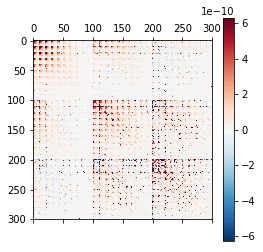

In [691]:
mat=rebinner(tot_mat)
vmax=np.percentile(mat,99.)
plt.matshow(mat,vmax=vmax,vmin=-vmax,cmap=cm.RdBu_r);
plt.colorbar();

In [662]:
b3=np.loadtxt(indir+'binct_c3_n10_l4_1_full.txt')
b4=np.loadtxt(indir+'binct_c4_n10_l4_1_full.txt')
b5=np.loadtxt(indir+'binct_c5_n10_l4_1_full.txt')
b6=np.loadtxt(indir+'binct_c6_n10_l4_1_full.txt')

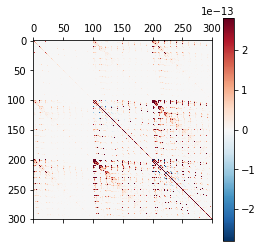

In [667]:
mat=rebinner(symmetrize(c3))#symmetrize(b6))
vmax=np.percentile(mat,99.)
plt.matshow(mat,vmax=vmax,vmin=-vmax,cmap=cm.RdBu_r);plt.colorbar();
#plt.ylim([100,0]);plt.xlim([0,100])

In [522]:
def collapse_axes(mat,c_bin,d_bin):
    new_mat = np.zeros([m,m,n,n])
    for i in range(len(mat)):
        p_bin = i%m
        a_bin = (i//m)//n
        b_bin = (i//m)%n
        for q_bin in range(m):
            new_mat[p_bin,q_bin,a_bin,b_bin] = mat[i,c_bin*n+d_bin*m+q_bin]
    return new_mat

In [523]:
def rebinner(mat):
    out_mat = np.zeros_like(mat)
    for i in range(m):
        for j in range(m):
            out_mat[i*n*n:(i+1)*n*n,j*n*n:(j+1)*n*n]=mat[i::m,j::m]
    return out_mat

(0, 100)

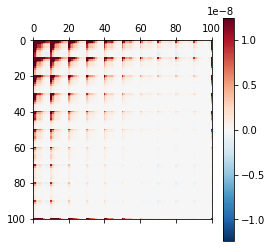

In [531]:
mat=rebinner(symmetrize(c6))#symmetrize(b6))
vmax=np.percentile(mat,99.)
plt.matshow(mat,vmax=vmax,vmin=-vmax,cmap=cm.RdBu_r);plt.colorbar();
plt.ylim([100,0]);plt.xlim([0,100])

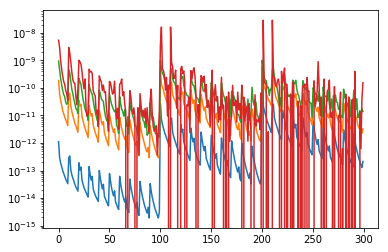

In [671]:
plt.plot(np.diag(rebinner(symmetrize(c3))))
plt.plot(np.diag(rebinner(symmetrize(c4))))
plt.plot(np.diag(rebinner(symmetrize(c5))))
plt.plot(np.diag(rebinner(symmetrize(c6))))
plt.yscale('log');

In [544]:
def variance(mat):
    out_mat = np.zeros([m,n,n])
    for p in range(m):
        for i in range(n):
            for j in range(n):
                out_mat[p,i,j]=mat[(i*n+j)*m+p,(i*n+j)*m+p]
    return out_mat

In [571]:
collapsed_mat = collapse_axes(tot_mat,5,7)
collapsed_mat.shape

(3, 3, 10, 10)

In [649]:
def collapse_axes_all_corr(mat,c_bin,d_bin):
    new_mat = np.zeros([n*m,n*m])
    for i in range(len(mat)):
        p_bin = i%m
        a_bin = (i//m)//n
        b_bin = (i//m)%n
        for q_bin in range(m):
            new_mat[p_bin*n+a_bin,q_bin*n+b_bin] += mat[i,c_bin*n*m+d_bin*m+q_bin]
    # Now compute correlation matrix
    corr_mat = np.zeros([n*m,n*m])
    for i in range(len(corr_mat)):
        p_bin = i//n
        a_bin = i%n
        for j in range(len(corr_mat[0])):
            q_bin = j//n
            b_bin = j%n
            corr_mat[p_bin*n+a_bin,q_bin*n+b_bin]=new_mat[p_bin*n+a_bin,q_bin*n+b_bin]/np.sqrt(new_mat[p_bin*n+a_bin,q_bin*n+a_bin]*new_mat[p_bin*n+b_bin,q_bin*n+b_bin])
    return corr_mat

/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


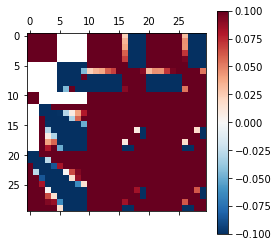

In [652]:
collapsed_mat = collapse_axes_all_corr(tot_mat,5,7)
vmax=np.percentile(collapsed_mat,99.9)
plt.matshow(collapsed_mat,vmax=vmax,vmin=-vmax,cmap=cm.RdBu_r);
#plt.title(r'$C_{%d%d}$'%(2*i,2*j))
plt.colorbar();

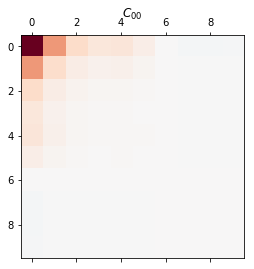

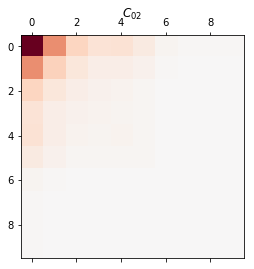

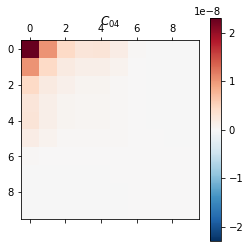

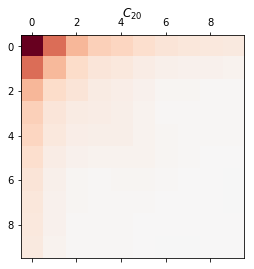

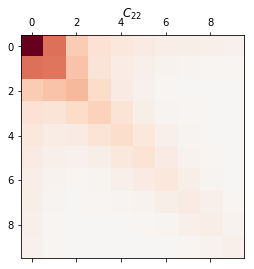

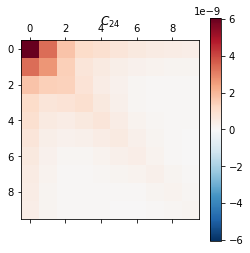

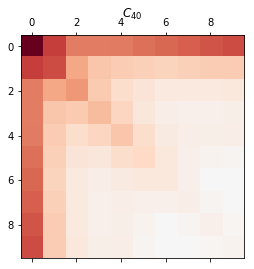

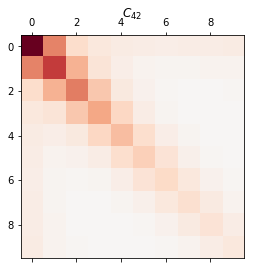

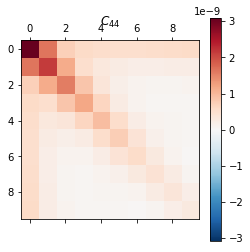

In [648]:
collapsed_mat = collapse_axes(tot_mat,5,7)
for i in range(3):
    for j in range(3):
        vmax=np.percentile(collapsed_mat[i,j],99.9)
        plt.matshow(collapsed_mat[i,j],vmax=vmax,vmin=-vmax,cmap=cm.RdBu_r);
        plt.title(r'$C_{%d%d}$'%(2*i,2*j))
    plt.colorbar();